In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names))
X_Data = pd.DataFrame(cancer.data,columns = col_names )
y = pd.DataFrame(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,test_size=0.3, random_state=0)

30


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(ada.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(ada.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.977


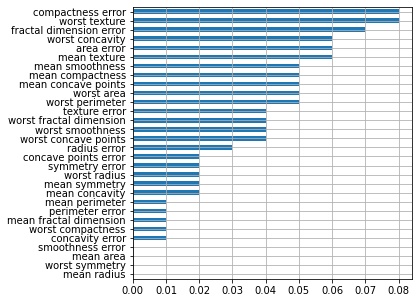

In [ ]:
feature_imp =pd.Series(ada.feature_importances_, index=cancer.feature_names).sort_values(ascending=True)
feature_imp

feature_imp.plot(kind='barh', grid=True, figsize=(5,5))
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.977


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.987
테스트 세트 정확도: 0.959


In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=learning_rate, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.987
Accuracy score (test): 0.947
Learning rate:  0.075
Accuracy score (training): 0.992
Accuracy score (test): 0.947
Learning rate:  0.1
Accuracy score (training): 0.995
Accuracy score (test): 0.947
Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (test): 0.965
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (test): 0.965
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (test): 0.959
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (test): 0.971


In [ ]:
from sklearn.metrics import classification_report
gb_clf2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.25, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



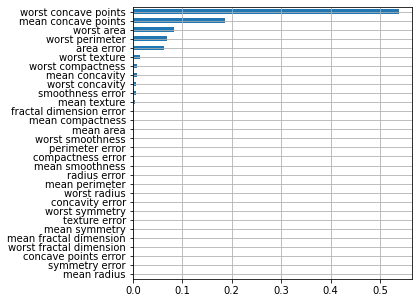

In [ ]:
feature_imp =pd.Series(gb_clf2.feature_importances_, index=cancer.feature_names).sort_values(ascending=True)
feature_imp
# print(feature_imp)
feature_imp.plot(kind='barh', grid=True, figsize=(5,5))
plt.show()


In [ ]:
from xgboost import plot_importance
from xgboost import XGBClassifier

# import xgboost as xgb

In [ ]:
xgbb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
X_train = pd.DataFrame(X_train, columns=cancer.feature_names)
X_test = pd.DataFrame(X_test, columns=cancer.feature_names)
xgbb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(xgbb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(xgbb.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.982


In [ ]:
fscore = xgbb.get_booster().get_fscore()
score_f= sorted(fscore.items(),key=(lambda x:x[1]), reverse=True)
print(score_f)
#performance measure는 purity(Gini index)가 사용


[('area error', 99), ('worst texture', 97), ('worst concave points', 60), ('compactness error', 59), ('mean concave points', 53), ('worst perimeter', 51), ('mean texture', 48), ('worst area', 43), ('worst symmetry', 36), ('worst smoothness', 34), ('mean smoothness', 33), ('worst concavity', 30), ('concave points error', 27), ('symmetry error', 23), ('worst radius', 20), ('mean symmetry', 13), ('concavity error', 12), ('radius error', 8), ('fractal dimension error', 8), ('mean perimeter', 6), ('mean compactness', 6), ('worst fractal dimension', 5), ('texture error', 5), ('mean fractal dimension', 5), ('worst compactness', 4), ('perimeter error', 3), ('smoothness error', 2), ('mean concavity', 2)]


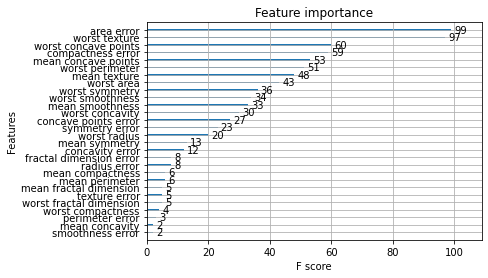

In [ ]:
import matplotlib.pyplot as plt
plot_importance(xgbb)
plt.show()

In [ ]:
evals= [(X_test, y_test)]

In [ ]:
xgbb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric= "logloss", eval_set=evals, verbose=True)

[0]	validation_0-logloss:0.616254
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.552222
[2]	validation_0-logloss:0.497173
[3]	validation_0-logloss:0.451114
[4]	validation_0-logloss:0.41145
[5]	validation_0-logloss:0.376245
[6]	validation_0-logloss:0.346895
[7]	validation_0-logloss:0.321736
[8]	validation_0-logloss:0.297128
[9]	validation_0-logloss:0.278138
[10]	validation_0-logloss:0.258978
[11]	validation_0-logloss:0.244454
[12]	validation_0-logloss:0.231649
[13]	validation_0-logloss:0.218429
[14]	validation_0-logloss:0.207021
[15]	validation_0-logloss:0.197053
[16]	validation_0-logloss:0.189106
[17]	validation_0-logloss:0.181272
[18]	validation_0-logloss:0.171914
[19]	validation_0-logloss:0.163683
[20]	validation_0-logloss:0.158706
[21]	validation_0-logloss:0.151048
[22]	validation_0-logloss:0.145501
[23]	validation_0-logloss:0.141746
[24]	validation_0-logloss:0.13759
[25]	validation_0-logloss:0.134373
[26]	validation_0-logloss:0.13169

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
def get_clf_eval(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))


In [ ]:

xgb_wrapper = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=400,
              random_state=42)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, 
                eval_metric='logloss', eval_set=evals , verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test, ws10_preds)

[0]	validation_0-logloss:0.684982
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.677047
[2]	validation_0-logloss:0.66924
[3]	validation_0-logloss:0.661546
[4]	validation_0-logloss:0.654058
[5]	validation_0-logloss:0.646649
[6]	validation_0-logloss:0.639503
[7]	validation_0-logloss:0.63236
[8]	validation_0-logloss:0.625409
[9]	validation_0-logloss:0.618642
[10]	validation_0-logloss:0.611856
[11]	validation_0-logloss:0.605358
[12]	validation_0-logloss:0.598751
[13]	validation_0-logloss:0.592482
[14]	validation_0-logloss:0.586161
[15]	validation_0-logloss:0.580078
[16]	validation_0-logloss:0.573999
[17]	validation_0-logloss:0.568012
[18]	validation_0-logloss:0.562194
[19]	validation_0-logloss:0.55635
[20]	validation_0-logloss:0.550759
[21]	validation_0-logloss:0.545171
[22]	validation_0-logloss:0.53968
[23]	validation_0-logloss:0.534332
[24]	validation_0-logloss:0.529075
[25]	validation_0-logloss:0.523786
[26]	validation_0-logloss:0.51859
[2

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xg = XGBClassifier()

param_grid={
    'max_depth':[4,6,8,10,12],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15]}

In [ ]:
gcv=GridSearchCV(xg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
gcv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': [4, 6, 8, 10, 12],
                         'n_estimators': [50, 100]},
   

In [ ]:
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)

final params {'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 100}
best score 0.9547468354430378


In [ ]:
cv_result_df=pd.DataFrame(gcv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)


In [ ]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
31,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.954747,1
39,"{'learning_rate': 0.15, 'max_depth': 12, 'n_es...",0.952247,2
37,"{'learning_rate': 0.15, 'max_depth': 10, 'n_es...",0.952247,2
35,"{'learning_rate': 0.15, 'max_depth': 8, 'n_est...",0.952247,2
33,"{'learning_rate': 0.15, 'max_depth': 6, 'n_est...",0.952247,2
23,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.949747,6
25,"{'learning_rate': 0.1, 'max_depth': 8, 'n_esti...",0.949747,6
27,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.949747,6
29,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est...",0.949747,6
30,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.949747,6


In [ ]:
xg_cv = XGBClassifier(learing_rate=0.01, max_depth= 6, n_estimators= 100)

In [ ]:
xg_cv.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learing_rate=0.01, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = xg_cv.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
col_names = cancer.feature_names
print(len(col_names))
X_Data = pd.DataFrame(cancer.data,columns = col_names )
y = pd.DataFrame(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,test_size=0.3, random_state=0)

30


In [ ]:
from lightgbm import LGBMClassifier , plot_importance

In [ ]:
lgb = LGBMClassifier(n_estimators=500,random_state=42)
X_train = pd.DataFrame(X_train,columns = col_names )
X_test = pd.DataFrame(X_test,columns = col_names )

lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(lgb.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(lgb.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.982


In [ ]:
lgb.fit(X_train, y_train)
predictions = lgb.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       0.97      1.00      0.99       108

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
evals= [(X_test, y_test)]

In [ ]:
lgb.fit(X_train, y_train, early_stopping_rounds=100, eval_metric= "logloss", eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.586823	valid_0's binary_logloss: 0.586823
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.526709	valid_0's binary_logloss: 0.526709
[3]	valid_0's binary_logloss: 0.477581	valid_0's binary_logloss: 0.477581
[4]	valid_0's binary_logloss: 0.436373	valid_0's binary_logloss: 0.436373
[5]	valid_0's binary_logloss: 0.399279	valid_0's binary_logloss: 0.399279
[6]	valid_0's binary_logloss: 0.368683	valid_0's binary_logloss: 0.368683
[7]	valid_0's binary_logloss: 0.341195	valid_0's binary_logloss: 0.341195
[8]	valid_0's binary_logloss: 0.320018	valid_0's binary_logloss: 0.320018
[9]	valid_0's binary_logloss: 0.297786	valid_0's binary_logloss: 0.297786
[10]	valid_0's binary_logloss: 0.280081	valid_0's binary_logloss: 0.280081
[11]	valid_0's binary_logloss: 0.263676	valid_0's binary_logloss: 0.263676
[12]	valid_0's binary_logloss: 0.243991	valid_0's binary_logloss: 0.243991
[13]	valid_0's binary_logloss: 0.232778	valid_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

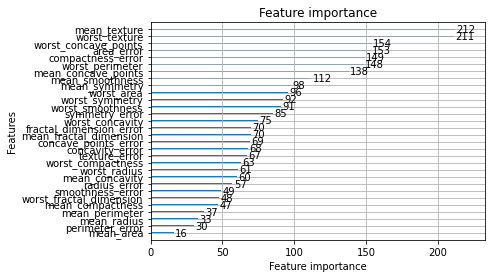

In [ ]:
import matplotlib.pyplot as plt
plot_importance(lgb)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lb = LGBMClassifier()

param_grid={
    'max_depth':[1,2,3,4],
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.05,0.1,0.15]}

In [ ]:
lgb_cv=GridSearchCV(lb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)
lgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_

In [ ]:
print('final params', lgb_cv.best_params_)   # 최적의 파라미터 값 출력
print('best score', lgb_cv.best_score_)

final params {'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100}
best score 0.967373417721519


In [ ]:
cv_result_df=pd.DataFrame(lgb_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)

In [ ]:
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

,params,mean_test_score,rank_test_score
27,"{'learning_rate': 0.15, 'max_depth': 2, 'n_est...",0.967373,1
23,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.964873,2
21,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.964873,2
28,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.964842,4
29,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.962373,5
25,"{'learning_rate': 0.15, 'max_depth': 1, 'n_est...",0.962342,6
31,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.959873,7
30,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.959842,8
19,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.959778,9
26,"{'learning_rate': 0.15, 'max_depth': 2, 'n_est...",0.957310,10


In [ ]:
lb_cv = LGBMClassifier(learing_rate= 0.15, max_depth=2, n_estimators= 100)
lb_cv.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learing_rate=0.15, learning_rate=0.1,
               max_depth=2, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
predictions = lb_cv.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [9]:
#코랩
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd

data = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))

#주피터
# data=pd.read_csv("D:/big_data/titanic.csv")
#상위 데이터 보여주기
display(data.head())

Saving titanic.csv to titanic (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# print(data.shape)
# data.columns.values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
y_data = data["Survived"]
data.drop(labels="Survived", axis=1, inplace=True)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
drop_columns = ["PassengerId","Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
data.drop(labels=drop_columns, axis=1, inplace=True)
display(data.head())

,Pclass,Sex,Fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [13]:
data = pd.get_dummies(data, columns=["Sex"])
data.fillna(value=0.0, inplace=True)
display(data.head())

,Pclass,Fare,Sex_female,Sex_male
0,3,7.2500,0,1
1,1,71.2833,1,0
2,3,7.9250,1,0
3,1,53.1000,1,0
4,3,8.0500,0,1


In [14]:
state = 42  
test_size = 0.30  
  
X_train, X_test, y_train, y_test = train_test_split(data, y_data,  
    test_size=test_size, random_state=state)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [22]:

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "n_estimators":[10,50,100]
    }



gb_cv = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1)
gb_cv.fit(X_train, y_train)

print('final params', gb_cv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gb_cv.best_score_)

cv_result_df=pd.DataFrame(gb_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)
  

final params {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
best score 0.8202709677419355
    mean_fit_time
58       0.100957
59       0.193820
48       0.026806
35       0.320991
61       0.170279
..            ...
36       0.016142
9        0.015276
6        0.038306
3        0.024510
0        0.017966

[63 rows x 1 columns]


In [25]:
print(cv_result_df.iloc[:,4:6])  

   param_learning_rate param_max_depth
58                 0.2               5
59                 0.2               5
48                0.15               5
35               0.075               8
61                 0.2               8
..                 ...             ...
36                 0.1               3
9                0.025               3
6                 0.01               8
3                 0.01               5
0                 0.01               3

[63 rows x 2 columns]


In [17]:
from sklearn.metrics import classification_report

gb_clf2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.2, max_depth=5, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Pclass        0.142637
Sex_female    0.191706
Sex_male      0.208978
Fare          0.456679
dtype: float64


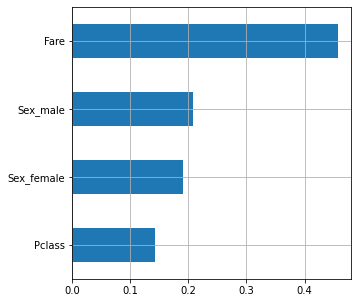

In [28]:

feature_imp =pd.Series(gb_clf2.feature_importances_, index=data.columns).sort_values(ascending=True)
print(feature_imp)
feature_imp.plot(kind='barh', grid=True, figsize=(5,5))
plt.show()


In [29]:
from xgboost import plot_importance
from xgboost import XGBClassifier
# import xgboost as xgb

In [30]:
xgg = XGBClassifier()


parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "n_estimators":[10,50,100]
    }



xgg_cv=GridSearchCV(xgg, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=1)
xgg_cv.fit(X_train, y_train)

print('final params', xgg_cv.best_params_)   # 최적의 파라미터 값 출력
print('best score', xgg_cv.best_score_)

cv_result_df=pd.DataFrame(xgg_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

final params {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100}
best score 0.8074322580645161


,params,mean_test_score,rank_test_score
62,"{'learning_rate': 0.2, 'max_depth': 8, 'n_esti...",0.807432,1
40,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.807368,2
57,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.805768,3
23,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.805768,3
53,"{'learning_rate': 0.15, 'max_depth': 8, 'n_est...",0.804232,5
14,"{'learning_rate': 0.025, 'max_depth': 5, 'n_es...",0.804168,6
13,"{'learning_rate': 0.025, 'max_depth': 5, 'n_es...",0.804168,6
22,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.804155,8
31,"{'learning_rate': 0.075, 'max_depth': 5, 'n_es...",0.802555,9
46,"{'learning_rate': 0.15, 'max_depth': 3, 'n_est...",0.800968,10


In [31]:
xg_clf2 = XGBClassifier(n_estimators=100, learning_rate=0.2,  max_depth=8, random_state=0)
X_train = pd.DataFrame(X_train, columns=data.columns)
X_test = pd.DataFrame(X_test, columns=data.columns)
# print(X_train)

xg_clf2.fit(X_train, y_train)
predictions = xg_clf2.predict(X_test)
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.83      0.69      0.75       111

    accuracy                           0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
# help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boosting. Deprecated. Use verbosity instead.
 |  objective : string or callable
 |      Specify the learning task and the corresponding learning objective or
 |      a custom objective function to be used (see note below).
 |  booster: string
 |      Specify which booster to use: gbtree, gblinear or dart.
 |  nthread : int
 |      Number of parallel threads used to run xgboost.  (Deprecated, please use ``n_jobs``)
 |  n

In [32]:
fscore = xg_clf2.get_booster().get_fscore()
score_f= sorted(fscore.items(),key=(lambda x:x[1]), reverse=True)
print(score_f)

[('Fare', 1650), ('Sex_female', 90), ('Pclass', 90)]


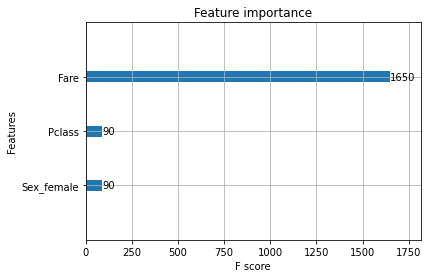

In [33]:
import matplotlib.pyplot as plt
plot_importance(xg_clf2)
plt.show()

In [34]:
from lightgbm import LGBMClassifier , plot_importance

In [35]:
lb = LGBMClassifier()


parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[1,2,3,4],
    "n_estimators":[10,50,100]
    }


lgb_cv=GridSearchCV(lb, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=1)
lgb_cv.fit(X_train, y_train)

print('final params', lgb_cv.best_params_)   # 최적의 파라미터 값 출력
print('best score', lgb_cv.best_score_)

cv_result_df=pd.DataFrame(lgb_cv.cv_results_)
cv_result_df.sort_values(by=['rank_test_score'], inplace=True)
cv_result_df[['params', 'mean_test_score', 'rank_test_score']].head(10)

final params {'learning_rate': 0.025, 'max_depth': 4, 'n_estimators': 50}
best score 0.8218580645161291


,params,mean_test_score,rank_test_score
81,"{'learning_rate': 0.2, 'max_depth': 4, 'n_esti...",0.821858,1
22,"{'learning_rate': 0.025, 'max_depth': 4, 'n_es...",0.821858,1
69,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.821858,1
11,"{'learning_rate': 0.01, 'max_depth': 4, 'n_est...",0.818658,4
57,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.818658,4
46,"{'learning_rate': 0.075, 'max_depth': 4, 'n_es...",0.807394,6
34,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",0.805858,7
23,"{'learning_rate': 0.025, 'max_depth': 4, 'n_es...",0.805858,7
70,"{'learning_rate': 0.15, 'max_depth': 4, 'n_est...",0.805794,9
64,"{'learning_rate': 0.15, 'max_depth': 2, 'n_est...",0.805781,10


In [36]:
LG_clf2 = LGBMClassifier(n_estimators=50, learning_rate=0.025, max_depth=4, random_state=0)
X_train = pd.DataFrame(X_train, columns=data.columns)
X_test = pd.DataFrame(X_test, columns=data.columns)
# print(X_train)

LG_clf2.fit(X_train, y_train)
predictions = LG_clf2.predict(X_test)
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       157
           1       0.85      0.56      0.67       111

    accuracy                           0.78       268
   macro avg       0.80      0.74      0.75       268
weighted avg       0.79      0.78      0.77       268



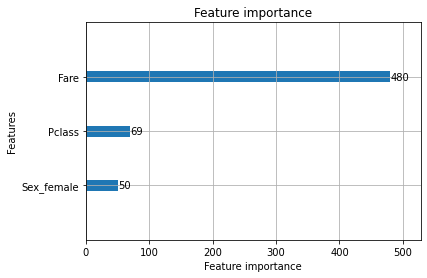

In [37]:
import matplotlib.pyplot as plt
plot_importance(LG_clf2)
plt.show()

In [ ]:
from xgboost import XGBRegressor # 회귀트리 모델
from xgboost import plot_importance # 중요변수 시각화

from sklearn.datasets import load_boston # dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
boston = load_boston()
X = boston.data
y = boston.target
col_names = boston.feature_names

In [ ]:
print(X.shape), # (506, 13) # 13개의 칼럼
print(y.shape)
print(col_names)


(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(x_train.shape) # (354, 13)
print(x_test.shape) # (152, 13)

(354, 13)
(152, 13)


In [ ]:
model = XGBRegressor(objective ='reg:squarederror')
x_train = pd.DataFrame(x_train, columns=boston.feature_names)
x_test = pd.DataFrame(x_test, columns=boston.feature_names)
model.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y_predd = model.predict(x_test)
y_true = y_test

In [ ]:
mse = mean_squared_error(y_true, y_predd)
mse 

9.561559682544305

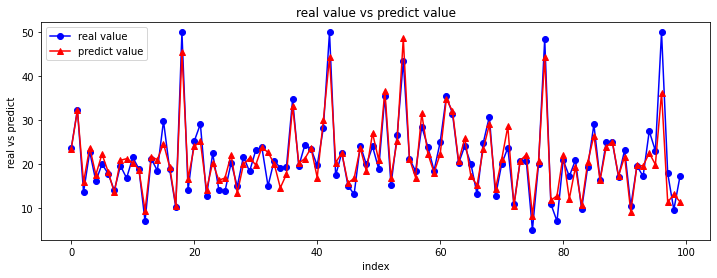

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_true[:100], marker='o', color='blue', label='real value')
chart.plot(y_predd[:100], marker='^', color='red', label='predict value')
chart.set_title('real value vs predict value')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 



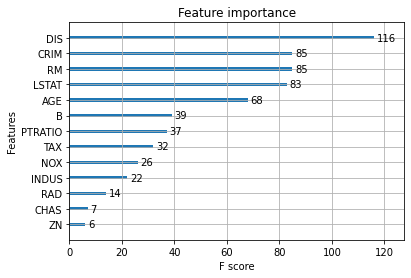

In [ ]:
import matplotlib.pyplot as plt
plot_importance(model)
plt.show()

In [ ]:
from lightgbm import LGBMRegressor , plot_importance

In [ ]:
model_lgb=LGBMRegressor()
x_train = pd.DataFrame(x_train, columns=boston.feature_names)
x_test = pd.DataFrame(x_test, columns=boston.feature_names)

model_lgb.fit(x_train, y_train)
model_lgb

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = model_lgb.predict(x_test)
y_true = y_test

In [ ]:
mse = mean_squared_error(y_true, y_pred)
mse 

11.346167217013914

In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


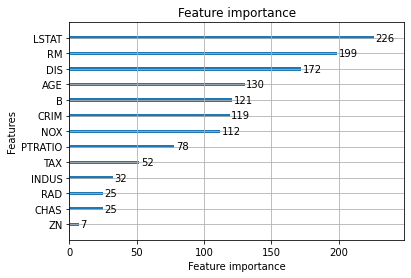

In [ ]:
import matplotlib.pyplot as plt
plot_importance(model_lgb)
plt.show()

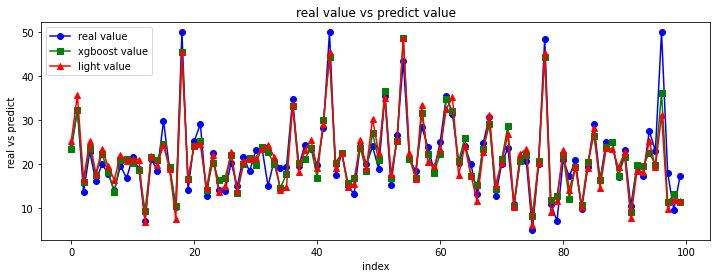

In [ ]:
import matplotlib.pyplot as plt

# y_true.shape # (5160,) : 5160개의 데이터 => 많으니까 100개만 출력 시도

fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_true[:100], marker='o', color='blue', label='real value')
chart.plot(y_predd[:100], marker='s', color='green', label='xgboost value')
chart.plot(y_pred[:100], marker='^', color='red', label='light value')
chart.set_title('real value vs predict value')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 

# 위에 블럭 실행